In [1]:
# Import all required dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import pandas as pd

import numpy as np

import os

from datetime import datetime

import calendar
import matplotlib.pyplot as plt

import matplotlib as mpl
import seaborn as sns
from scipy.stats import linregress
import scipy.stats as stats
#from spread import variance, standard_deviation, zipped_z_scoresimport warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load (Remember to change these)
movies_data_load = "C:/Users/admin/Documents/SMU/etlproject/Movies_Merged.csv"

# Read the City and Ride Data
movies_data = pd.read_csv(movies_data_load)
movies_data.columns

Index(['Unnamed: 0', 'Title', 'budget', 'popularity', 'production_companies',
       'release_date', 'runtime', 'revenue', 'status', 'vote_average',
       'vote_count', 'Year', 'Genre', 'Awards', 'Metascore', 'BoxOffice'],
      dtype='object')

In [3]:
movies_data[['budget_fmt']] = movies_data[['budget']]/1000000

In [4]:
movies_data.describe()

Unnamed: 0        budget   popularity      runtime       revenue  \
count  3139.000000  3.139000e+03  3139.000000  3139.000000  3.139000e+03   
mean   1569.000000  3.411063e+07    23.968841   105.441822  9.435391e+07   
std     906.295574  4.548869e+07    36.296325    20.118782  1.810473e+08   
min       0.000000  0.000000e+00     0.001186     0.000000  0.000000e+00   
25%     784.500000  1.200000e+06     5.646191    93.000000  0.000000e+00   
50%    1569.000000  1.800000e+07    14.808304   103.000000  2.543429e+07   
75%    2353.500000  4.500000e+07    31.378276   116.000000  1.030121e+08   
max    3138.000000  3.800000e+08   875.581305   214.000000  2.787965e+09   

       vote_average    vote_count         Year    Metascore   budget_fmt  
count   3139.000000   3139.000000  3139.000000  3139.000000  3139.000000  
mean       6.031666    796.403632  2007.951896    47.968143    34.110633  
std        1.141007   1348.122016     4.632021    23.383226    45.488692  
min        0.000000      0.000000  2000.000000     0.000000     0.000000  
25%        5.500000     69.500000  2004.000000    35.000000     1.200000  
50%        6.200000    291.000000  2008.000000    50.000000    18.000000  
75%        6.700000    888.500000  2012.000000    65.000000    45.000000  
max       10.000000  13752.000000  2016.000000   100.000000   380.000000

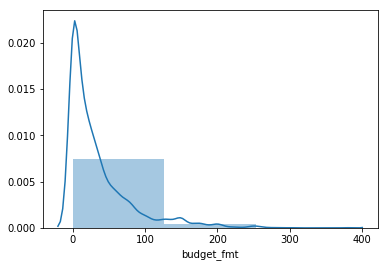

In [5]:

sns.distplot(movies_data.budget_fmt,bins=3)

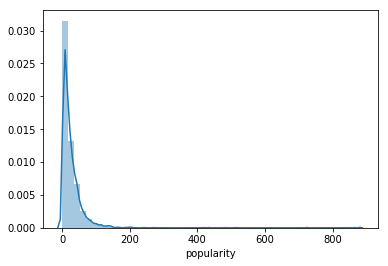

In [6]:
sns.distplot(movies_data.popularity,bins=50)

In [7]:
movies_data_cnt =movies_data[['Year','budget_fmt']]

movies_data_grp = movies_data_cnt.groupby(["Year"]).agg(["mean","count"])

movies_data_grp.reset_index(inplace=True)
movies_data_grp.set_axis(1, range(len(movies_data_grp.columns)))
movies_data_grp.rename(columns = {0:'Year',1 : 'Budget',2:'Count'}, inplace = True)
movies_data_grp

Year     Budget  Count
0   2000  34.369032    155
1   2001  30.423505    173
2   2002  30.218797    186
3   2003  32.585774    159
4   2004  33.352222    188
5   2005  32.529705    188
6   2006  28.918914    221
7   2007  32.384793    181
8   2008  33.656306    206
9   2009  32.253958    219
10  2010  35.325930    207
11  2011  37.057548    202
12  2012  38.501459    182
13  2013  38.456436    199
14  2014  33.460302    209
15  2015  35.740716    178
16  2016  49.213837     86

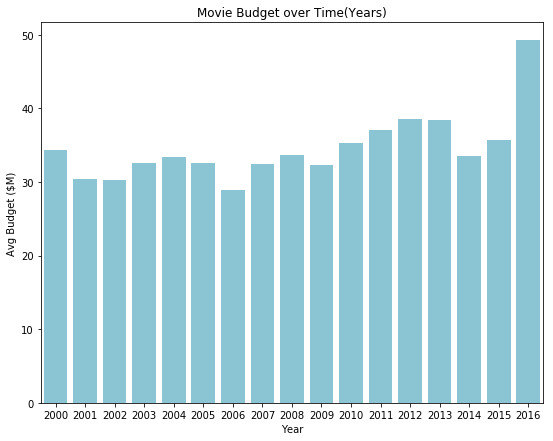

In [8]:
fig, ax = plt.subplots(figsize = (9,7))
movie_budget_bar = sns.barplot(x="Year", y="Budget", data=movies_data_grp, color="#0098BF", alpha=0.5)
#ax2 = ax.twinx()
#movies_data_grp.plot(x="Year", y="Count", movie_budget_bar=ax2, legend=False, color="r")

plt.title("Movie Budget over Time(Years)")
plt.ylabel("Avg Budget ($M)")

# Save Figure
plt.savefig("C:/Users/admin/Documents/SMU/etlproject/static/images/Budget_bar.png")
plt.show()



In [9]:
movies_data['Genre_Type1'] = movies_data.Genre.apply(lambda s : s.split(",")[0])
movies_data

Unnamed: 0                                      Title     budget  \
0              0                  The Widow of Saint-Pierre          0   
1              1                                Next Friday   11000000   
2              2                                My Dog Skip    7000000   
3              3                                  Supernova   90000000   
4              4                                Down to You    9000000   
5              5                                    Urbania          0   
6              6                            Isn't She Great   36000000   
7              7  The Broken Hearts Club: A Romantic Comedy    1000000   
8              8                                   Scream 3   40000000   
9              9                                    Anatomy          0   
10            10                                    Gun Shy   10000000   
11            11                           The Tigger Movie   30000000   
12            12                                  The Beach   40000000   
13            13                                   Snow Day          0   
14            14                                 Hanging Up   40000000   
15            15                                Pitch Black   23000000   
16            16                                Boiler Room   26000000   
17            17                       The Whole Nine Yards   41300000   
18            18                                Wonder Boys   35000000   
19            19                             Reindeer Games   42000000   
20            20                                  3 Strikes    6000000   
21            21                  What Planet Are You From?   60000000   
22            22                        The Next Best Thing   25000000   
23            23                              Drowning Mona   16000000   
24            24                            Mission to Mars   90000000   
25            25                         The Young Unknowns          0   
26            26                          The Perfect Storm  120000000   
27            27                          Final Destination   23000000   
28            28                              High Fidelity   30000000   
29            29                         Digimon: The Movie    5500000   
...          ...                                        ...        ...   
3109        3109                           Now You See Me 2   90000000   
3110        3110                              Me Before You   20000000   
3111        3111                             The Neon Demon    7000000   
3112        3112                       Central Intelligence   50000000   
3113        3113                    The Secret Life of Pets   75000000   
3114        3114               Independence Day: Resurgence  165000000   
3115        3115                        Free State of Jones   50000000   
3116        3116                               The Shallows   17000000   
3117        3117                   The Purge: Election Year   10000000   
3118        3118                       The Legend of Tarzan  180000000   
3119        3119                           Star Trek Beyond  185000000   
3120        3120                                Yoga Hosers    5000000   
3121        3121                              The Dog Lover    2000000   
3122        3122                              Sausage Party   19000000   
3123        3123                            The Infiltrator   25000000   
3124        3124                       Kickboxer: Vengeance   17000000   
3125        3125                                 Lights Out    4900000   
3126        3126                               Fight Valley   27000000   
3127        3127                               Jason Bourne  120000000   
3128        3128                                      Nerve   20000000   
3129        3129                                   Bad Moms   20000000   
3130        3130                              Shin Godzilla   15000000   
3131      

In [10]:
movies_genre =movies_data[['Title','Genre_Type1']]

movies_genre_grp = movies_genre.groupby(["Genre_Type1"]).agg(["count"])


movies_genre_grp.reset_index(inplace=True)
movies_genre_grp.columns
movies_genre_grp.set_axis(1, range(len(movies_genre.columns)))
movies_genre_grp.rename(columns = {0:'Genre Category',1:"Movie Count"}, inplace = True)
top_category=movies_genre_grp.head(5)
top_category

Genre Category  Movie Count
0         Action          700
1      Adventure          181
2      Animation          183
3      Biography          175
4         Comedy          827

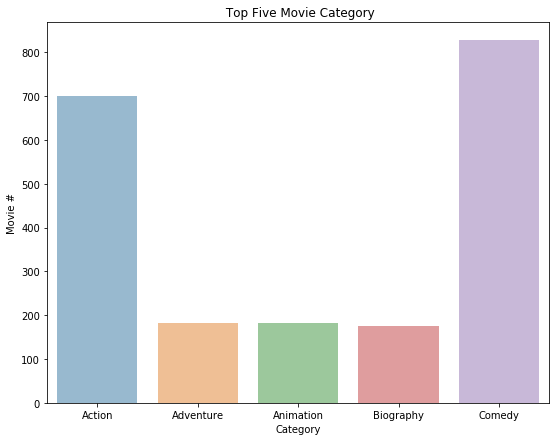

In [11]:
fig, ax = plt.subplots(figsize = (9,7))
movies_genre_bar = sns.barplot(x="Genre Category", y="Movie Count", data=top_category, orient="v", alpha=0.5)


plt.title(" Top Five Movie Category")
plt.xlabel("Category",)
plt.ylabel("Movie #")
plt.legend

# Save Figure
plt.savefig("C:/Users/admin/Documents/SMU/etlproject/static/images/TopFiveMovie_Category.png")
plt.show()


In [12]:

# Labels for the sections of our pie chart
Category = ["Action","Adventure","Animation","Biography","Comedy","Crime","Documentary","Drama","Family","Fantasy","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","Short","Western"]

# The values of each section of the pie chart
Movie_Count = [700,181,183,175,827, 200,92,591,4,10,136,1,16,5,5,2,8,3]

# The colors of each section of the pie chart


# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0)

In [13]:
plt.pie(Movie_Count,Category=labels,autopct="%1.1f%%", shadow=True, startangle=140)


NameError: name 'labels' is not defined

In [ ]:
budget_bins = [0, movies_data.describe().loc['25%','budget'], movies_data.describe().loc['50%','budget'],

       movies_data.describe().loc['75%','budget'], movies_data.describe().loc['max','budget']+100]

budget_bins

In [ ]:
movies_data.count()

In [ ]:
movies_noRevenue2 = movies_data[movies_data.budget <= 0 ].count()
print(movies_noRevenue2)